In [1]:
import pandas as pd
import numpy as  np

In [2]:
df = pd.read_csv("data/All_creatures_clean.csv")

In [3]:
conditions = [df['alignment'].isin(["LG","NG","CG","LN","N"]), [df['alignment'].isin(["LE","NE","CE","CN"])]]
values = [0,1]
array = np.select(conditions, values)

In [4]:
array[0]

array([1, 1, 0, ..., 0, 0, 1])

In [5]:
series = pd.Series(array[0])

In [6]:
df['target'] = series

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             2002 non-null   object 
 1   name            2002 non-null   object 
 2   alignment       2002 non-null   object 
 3   hp              2002 non-null   int64  
 4   ac              2002 non-null   int64  
 5   level           2002 non-null   int64  
 6   strength        2002 non-null   int64  
 7   dexterity       2002 non-null   int64  
 8   constitution    2002 non-null   int64  
 9   intelligence    2002 non-null   int64  
 10  wisdom          2002 non-null   int64  
 11  charisma        2002 non-null   int64  
 12  will_save       2002 non-null   int64  
 13  reflex_save     2002 non-null   int64  
 14  fortitude_save  2002 non-null   int64  
 15  perception      2002 non-null   int64  
 16  npc             2002 non-null   bool   
 17  size            2002 non-null   o

## Base Model

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
object_cols = ["_id", "name", "alignment", "rarity", "vision", "size", "target"]

In [10]:
X = df.drop(columns = object_cols)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
tree_clf = DecisionTreeClassifier(max_depth = 10)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

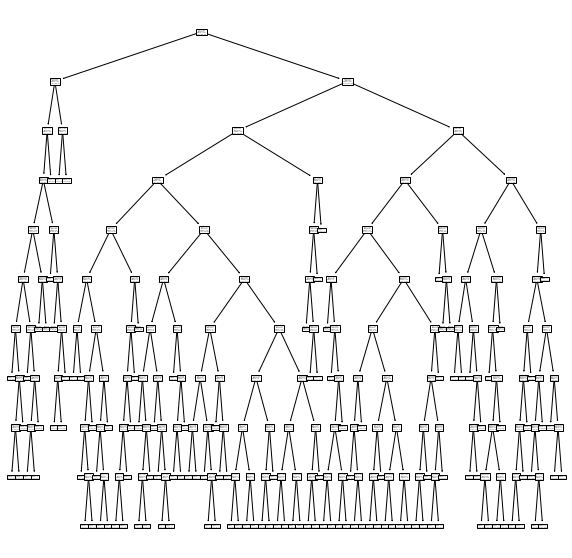

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax);

In [74]:
tree_clf.score(X_test, y_test)

0.7104825291181365

## Encoding

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             2002 non-null   object 
 1   name            2002 non-null   object 
 2   alignment       2002 non-null   object 
 3   hp              2002 non-null   int64  
 4   ac              2002 non-null   int64  
 5   level           2002 non-null   int64  
 6   strength        2002 non-null   int64  
 7   dexterity       2002 non-null   int64  
 8   constitution    2002 non-null   int64  
 9   intelligence    2002 non-null   int64  
 10  wisdom          2002 non-null   int64  
 11  charisma        2002 non-null   int64  
 12  will_save       2002 non-null   int64  
 13  reflex_save     2002 non-null   int64  
 14  fortitude_save  2002 non-null   int64  
 15  perception      2002 non-null   int64  
 16  npc             2002 non-null   bool   
 17  size            2002 non-null   o

In [16]:
df['vision'].unique()

array(['standard', 'Darkvision', 'Low-light vision', 'Greater darkvision'],
      dtype=object)

In [17]:
df['rarity'].unique()

array(['unique', 'uncommon', 'common', 'rare'], dtype=object)

In [18]:
df['size'].unique()

array(["['Small']", "['Medium']", "['Large']", "['Huge']",
       "['Gargantuan']", "['Tiny']"], dtype=object)

In [19]:
ord_cat_selector = ["rarity", 'vision', 'size']

In [20]:
cat_subset = df[ord_cat_selector]

In [21]:
rarity_list = ['common', 'uncommon', 'rare', 'unique']
vision_list = ['standard', 'Low-light vision', 'Darkvision', 'Greater darkvision']
size_list = ["['Tiny']", "['Small']", "['Medium']", "['Large']", "['Huge']", "['Gargantuan']"]

In [22]:
o_enc = OrdinalEncoder(categories = [rarity_list, vision_list, size_list])
o_enc.fit(cat_subset)

OrdinalEncoder(categories=[['common', 'uncommon', 'rare', 'unique'],
                           ['standard', 'Low-light vision', 'Darkvision',
                            'Greater darkvision'],
                           ["['Tiny']", "['Small']", "['Medium']", "['Large']",
                            "['Huge']", "['Gargantuan']"]])

In [23]:
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,rarity,vision,size
0,3.0,0.0,1.0
1,1.0,2.0,2.0
2,0.0,2.0,2.0
3,0.0,2.0,2.0
4,0.0,0.0,2.0
...,...,...,...
1997,0.0,2.0,1.0
1998,3.0,0.0,2.0
1999,2.0,3.0,1.0
2000,0.0,2.0,2.0


In [24]:
df = df.drop(columns = ['rarity', 'vision', 'size'])

In [25]:
df = pd.concat([df, X_subset], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             2002 non-null   object 
 1   name            2002 non-null   object 
 2   alignment       2002 non-null   object 
 3   hp              2002 non-null   int64  
 4   ac              2002 non-null   int64  
 5   level           2002 non-null   int64  
 6   strength        2002 non-null   int64  
 7   dexterity       2002 non-null   int64  
 8   constitution    2002 non-null   int64  
 9   intelligence    2002 non-null   int64  
 10  wisdom          2002 non-null   int64  
 11  charisma        2002 non-null   int64  
 12  will_save       2002 non-null   int64  
 13  reflex_save     2002 non-null   int64  
 14  fortitude_save  2002 non-null   int64  
 15  perception      2002 non-null   int64  
 16  npc             2002 non-null   bool   
 17  speed.max       2002 non-null   f

## Logistic Regression

In [34]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test) 

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [38]:
accuracy_score(y_test, y_pred)

0.800332778702163

In [40]:
from sklearn.metrics import classification_report


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       278
           1       0.79      0.85      0.82       323

    accuracy                           0.80       601
   macro avg       0.80      0.80      0.80       601
weighted avg       0.80      0.80      0.80       601



## Decision Tree

In [62]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

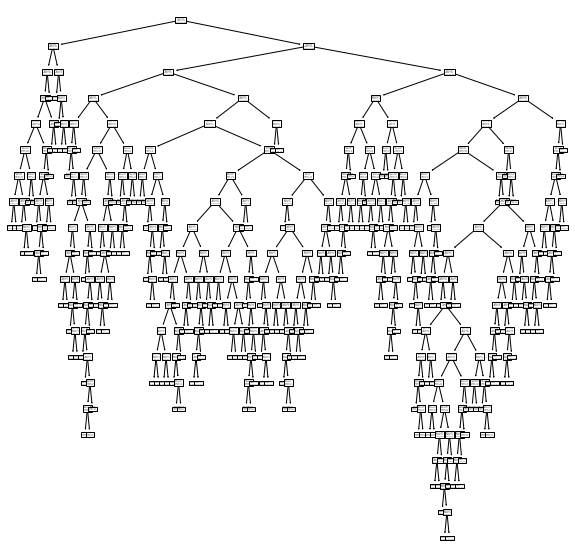

In [68]:
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax);

In [73]:
tree_clf.score(X_test, y_test)

0.7104825291181365

In [71]:
y_pred = tree_clf.predict(X_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       269
           1       0.72      0.77      0.75       332

    accuracy                           0.71       601
   macro avg       0.71      0.70      0.70       601
weighted avg       0.71      0.71      0.71       601



## Pipe

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.model_selection import KFold

### KNN

In [44]:
X = df.drop(columns = ['_id','name','alignment', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

model_pipe = Pipeline(steps)

In [50]:
pipe_grid = {'imputer__strategy': ["mean", "median"],
             'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18],
             'knn__p': [ 3, 4, 5, 6]}

# note: default scoring is aaccuracy
gs_pipe = GridSearchCV(estimator=model_pipe, 
                       param_grid=pipe_grid,
                       scoring="f1" )


In [51]:
gs_pipe.fit(X_train, y_train);

In [52]:
gs_pipe.best_params_

{'imputer__strategy': 'mean', 'knn__n_neighbors': 13, 'knn__p': 4}

In [53]:
gs_pipe.best_score_

0.8108421209439184

In [54]:
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13, p=4))])

In [55]:
y_pred = best_model.predict(X_test)

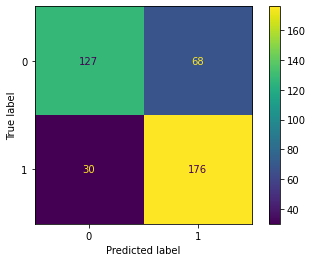

In [56]:
plot_confusion_matrix(best_model, X_test, y_test)